In [1]:
import os
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

import traceback
from tqdm import trange, tqdm

In [2]:
extract_dir = '..\\Data\\facebook'
extract_dir = 'D:\ROOT\\vk_data\\raw'
os.makedirs(extract_dir, exist_ok = True)

In [3]:
extracted_files = os.listdir(extract_dir)
the_file_name = 'groups&users.csv' 
extracted_files

['author_affiliated_with_institution_edges.npy',
 'groups&users all.csv',
 'groups&users.csv',
 'groups&users_.csv',
 'test_idx.npy',
 'train_idx.npy',
 'valid_idx.npy']

In [4]:
import re

def line_to_users(line):
    return split_line(line)[1:]
    
def split_line(line):
    return re.split(';|,', line.strip())[:]

In [5]:
# # See available nodes
# files = os.listdir(extract_dir)

# node_ids = set()    
# for file_name in files:
#     if file_name.endswith(('.edges', '.circles', '.feat', '.egofeat', '.featnames', the_file_name)):
#         with open(os.path.join(extract_dir,file_name)) as f:
#             for line in f:
#                 # node_id = file_name.split('.')[0]
#                 node_id = line_to_users(line)
#                 # for node in node_id
#                 node_ids.update(node_id)

# node_ids = sorted(node_ids)
# len(node_ids)

In [6]:
import itertools

# Извлекаем все пары пользователей в одном сообществе
def combinations(seq):
    yield from itertools.permutations(seq, 2)

# Function to load edges from a file
def load_edges(extract_dir):
    edges = []
    with open(extract_dir, 'r') as f:
        for line in tqdm(f):
            for c in combinations(line_to_users(line)):
                edge = tuple(map(int, c))
                edges.append(edge)
    return edges

In [7]:
edges_file = os.path.join(extract_dir, the_file_name)
edges = load_edges(edges_file)
print('Creating nx.Graph G')
# Printing number of nodes and edges for node from previous step
G = nx.Graph()
G.add_edges_from(edges)

100it [01:09,  1.45it/s]


Creating nx.Graph G


In [8]:
# # Load edges for node 0
# for node_id in node_ids:
    # edges_file = os.path.join(extract_dir, f'{node_id}.edges')

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# print(f"The ego network for node {node_id} contains {num_nodes} nodes and  {num_edges} edges")
print(f"The ego network contains {num_nodes} nodes and {num_edges} edges")

The ego network contains 30141 nodes and 12489117 edges


In [9]:
# Compute centrality measures (for each network)
## Define to compute centralities for each graph
def compute_centrality_measures(G):
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G)
    return {
        'degree_centrality': degree_centrality,
        'betweenness_centrality': betweenness_centrality,
        'closeness_centrality': closeness_centrality,
        'eigenvector_centrality': eigenvector_centrality
    }

def print_centrality_measures(node_id, centrality_measures):
    # print(f"Centrality measures for the ego network of node {node_id}:")
    print(f"Centrality measures for the ego network:")
    degree_centrality = centrality_measures['degree_centrality']
    betweenness_centrality = centrality_measures['betweenness_centrality']
    closeness_centrality = centrality_measures['closeness_centrality']
    eigenvector_centrality = centrality_measures['eigenvector_centrality']
    
    print(f"The average degree centrality is {sum(degree_centrality.values()) / len(degree_centrality):.4f}")
    print(f"The average betweenness centrality is {sum(betweenness_centrality.values()) / len(betweenness_centrality):.4f}")
    print(f"The average closeness centrality is {sum(closeness_centrality.values()) / len(closeness_centrality):.4f}")
    print(f"The average eigenvector centrality is {sum(eigenvector_centrality.values()) / len(eigenvector_centrality):.4f}")

# selected_node_ids = node_ids[:10]

# # for node_id in selected_node_ids:
# edges_file = os.path.join(extract_dir, the_file_name)
# edges = load_edges(edges_file)

# G = nx.Graph()
# G.add_edges_from(edges)

centrality_measures = compute_centrality_measures(G)

# print_centrality_measures(node_id, centrality_measures)
print_centrality_measures('', centrality_measures)
print("\n")

KeyboardInterrupt: 

In [ ]:
# Function to load circles from a file
def load_circles(extract_dir):
    circles = []
    with open(extract_dir, 'r') as f:
        for line in f:
            circle = line_to_users(line)
            circles.append(circle)
    return circles

In [ ]:
# Function to load features from a file
def load_features(extract_dir):
    features = []
    with open(extract_dir, 'r') as f:
        for line in f:
             features.append(list(map(int, line.strip().split()[1:])))
    return features

In [ ]:
# Function to load feature names from a file
def load_featnames(extract_dir):
    with open(extract_dir, 'r') as f:
        featnames = [line.strip() for line in f]
    return featnames

In [ ]:
# Function to adjust the length of the features
def adjust_features_length(features, target_length):
    while len(features) < target_length:
        features.append(0)
    return features

In [ ]:
# for node_id in selected_node_ids:
try:
    # Load circles
    circles_file = os.path.join(extract_dir, the_file_name)
    circles = load_circles(circles_file)
    num_circles = len(circles)
    avg_circle_size = sum(len(circle) for circle in circles) / num_circles if num_circles > 0 else 0

    # Print the analysis results
    # print(f"Analysis for node {node_id}:")
    print(f"Number of circles: {num_circles}")
    print(f"Average circle size: {avg_circle_size:.2f}")
    print()
except KeyError as e:
    # print(f"KeyError encountered for node {node_id}: {e}")
    print(f"KeyError encountered: {e}")
except Exception as e:
        # print(f"An error occurred for node {node_id}: {e}")
        print(f"An error occurred: {e}")

Number of circles: 10
Average circle size: 7.00



In [ ]:
# Computing diameter
def compute_diameter(G):
    try:
        diameter = nx.diameter(G)
    except nx.NetworkXError as e:
        print(f"Error computing diameter: {e}")
        diameter = float('inf')
    return diameter

diameter_results = {}
# for node_id in selected_node_ids:
try:
    # edges_file = os.path.join(extract_dir, the_file_name)
    # edges = load_edges(edges_file)

    # G = nx.Graph()
    # G.add_edges_from(edges)
    
    # print(f"Node {node_id} Graph Nodes: {list(G.nodes)[:5]}... (total {len(G.nodes)} nodes)")
    print(f"Graph Nodes: {list(G.nodes)[:5]}... (total {len(G.nodes)} nodes)")
    
    diameter = compute_diameter(G)
    # diameter_results[node_id] = diameter
    diameter_results = diameter
    
    # print(f"Diameter for the ego network of node {node_id}: {diameter}")
    print(f"Diameter for the ego network: {diameter}")
    
except KeyError as e:
    # print(f"KeyError encountered for node {node_id}: {e}")
    print(f"KeyError encountered: {e}")
except Exception as e:
    # print(f"An error occurred for node {node_id}: {e}")
    print(f"An error occurred: {e}")

diameter_results

Graph Nodes: [60059467, 63547528, 68738381, 72923740, 72926723]... (total 70 nodes)
Error computing diameter: Found infinite path length because the graph is not connected
An error occurred: unhashable type: 'list'


{}

In [ ]:
# Compute density
def compute_density(G):
    return nx.density(G)

density_results = {}
# for node_id in selected_node_ids:
try:
    # edges_file = os.path.join(extract_dir, the_file_name)
    # edges = load_edges(edges_file)
    
    # G = nx.Graph()
    # G.add_edges_from(edges)

    density = compute_density(G)
    # density_results[node_id] = density
    density_results = density
    
    # print(f"Density for the ego network of node {node_id}: {density:.4f}")
    print(f"Density for the ego network: {density:.4f}")
    
except KeyError as e:
    print(f"KeyError encountered for node {node_id}: {e}")
    traceback.print_exc()
except Exception as e:
    print(f"An error occurred for node {node_id}: {e}")
    traceback.print_exc()

Density for the ego network: 0.0878


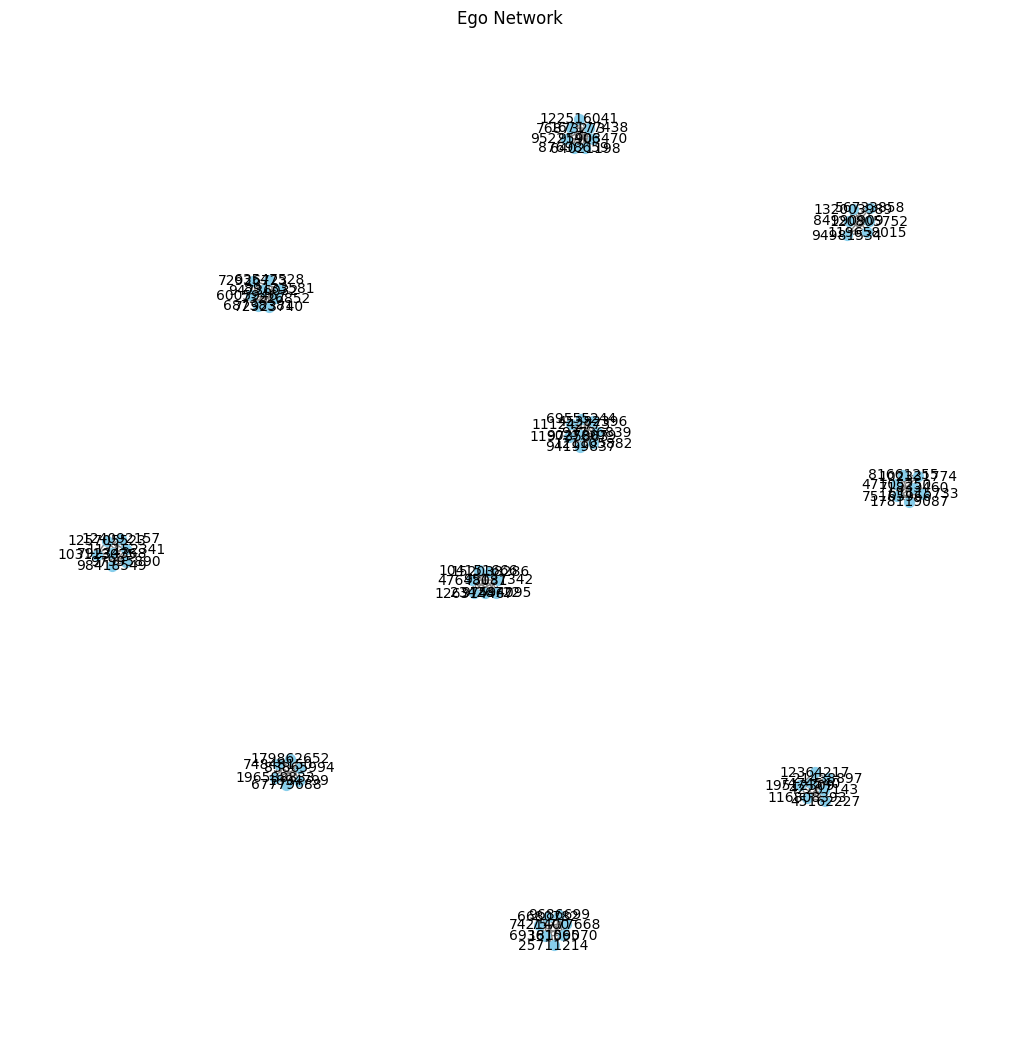

In [ ]:
# Visualizing graphs
def visualize_graph(node_id, G):
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)  # Positions for all nodes
    nx.draw(G, pos, with_labels=True, node_size=50, node_color="skyblue", edge_color="gray", font_size=10)
    # plt.title(f"Ego Network for Node {node_id}")
    plt.title(f"Ego Network")
    plt.show()

# for node_id in selected_node_ids:
try:
    # edges_file = os.path.join(extract_dir, the_file_name)
    # edges = load_edges(edges_file)
    
    # G = nx.Graph()
    # G.add_edges_from(edges)
    
    # visualize_graph(node_id, G)
    visualize_graph('', G)
    
except Exception as e:
    # print(f"An error occurred for node {node_id}: {e}")
    print(f"An error occurred: {e}")